In [1]:
#abrir csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("regression_data.csv", sep=';')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/09/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/09/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21597.0,NaN,NaN,NaN,4580474287.770987,2876735715.74778,1000102.0,2123049175.0,3904930410.0,7308900490.0,9900000190.0
date,21597,372,6/23/14,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,21597.0,NaN,NaN,NaN,3.3732,0.926299,1.0,3.0,3.0,4.0,33.0
bathrooms,21597.0,NaN,NaN,NaN,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,NaN,NaN,NaN,2080.32185,918.106125,370.0,1430.0,1910.0,2550.0,13540.0
sqft_lot,21597.0,NaN,NaN,NaN,15099.40876,41412.636876,520.0,5040.0,7618.0,10685.0,1651359.0
floors,21597.0,NaN,NaN,NaN,1.494096,0.539683,1.0,1.0,1.5,2.0,3.5
waterfront,21597.0,NaN,NaN,NaN,0.007547,0.086549,0.0,0.0,0.0,0.0,1.0
view,21597.0,NaN,NaN,NaN,0.234292,0.76639,0.0,0.0,0.0,0.0,4.0
condition,21597.0,NaN,NaN,NaN,3.409825,0.650546,1.0,3.0,3.0,4.0,5.0


<AxesSubplot: >

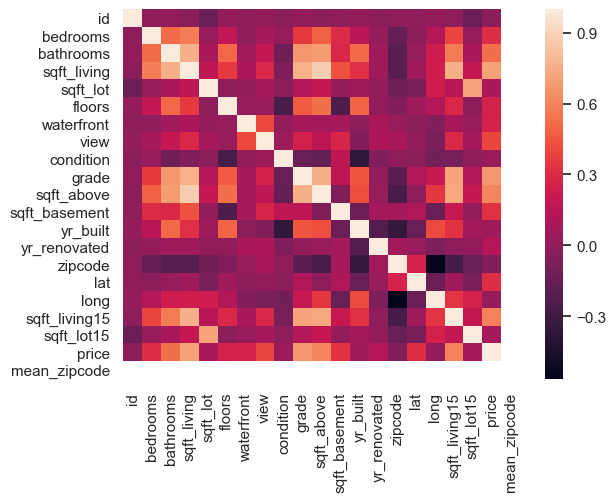

In [105]:

sns.heatmap(df.corr())

In [11]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

array([[<AxesSubplot: xlabel='id', ylabel='id'>,
        <AxesSubplot: xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot: xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot: xlabel='sqft_living', ylabel='id'>,
        <AxesSubplot: xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot: xlabel='floors', ylabel='id'>,
        <AxesSubplot: xlabel='waterfront', ylabel='id'>,
        <AxesSubplot: xlabel='view', ylabel='id'>,
        <AxesSubplot: xlabel='condition', ylabel='id'>,
        <AxesSubplot: xlabel='grade', ylabel='id'>,
        <AxesSubplot: xlabel='sqft_above', ylabel='id'>,
        <AxesSubplot: xlabel='sqft_basement', ylabel='id'>,
        <AxesSubplot: xlabel='yr_built', ylabel='id'>,
        <AxesSubplot: xlabel='yr_renovated', ylabel='id'>,
        <AxesSubplot: xlabel='zipcode', ylabel='id'>,
        <AxesSubplot: xlabel='lat', ylabel='id'>,
        <AxesSubplot: xlabel='long', ylabel='id'>,
        <AxesSubplot: xlabel='sqft_living15', ylabel='id'>,
        <Axe

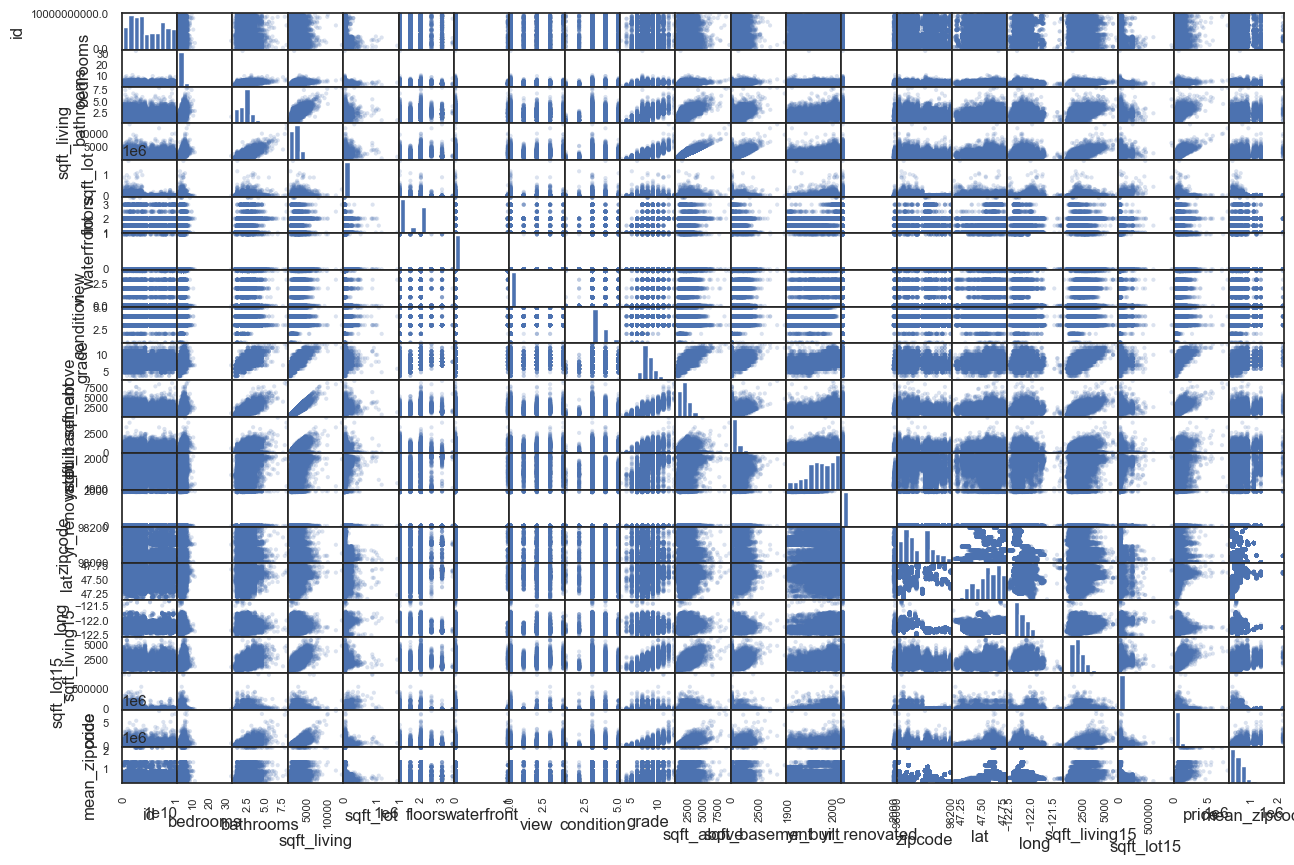

In [154]:
pd.plotting.scatter_matrix(df, figsize=(15, 10), alpha=0.2)


In [17]:
from scipy.stats import boxcox

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [110]:
df[df.bedrooms != 0 ].shape

(21597, 22)

<AxesSubplot: >

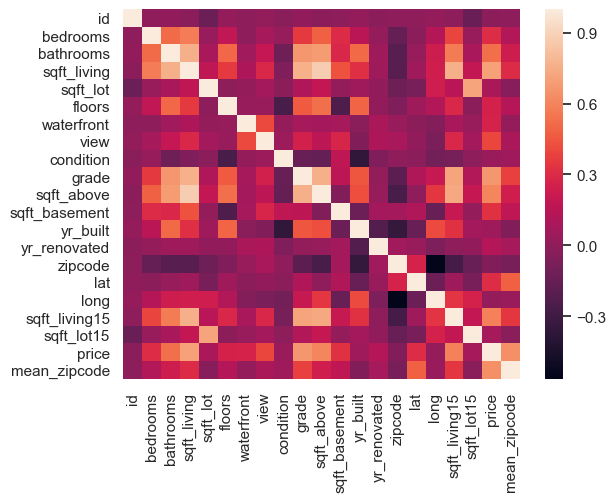

In [112]:


sns.heatmap(df.corr())

In [197]:
X = df.drop("zipcode", axis=1)

y = df.price

X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,mean_zipcode
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,1340,5650,221900,310612.755725
1,6414100192,12/09/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,1690,7639,538000,469928.767726
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,2720,8062,180000,462488.869258
3,2487200875,12/09/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,1360,5000,604000,551768.520913
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,1800,7503,510000,685675.843537


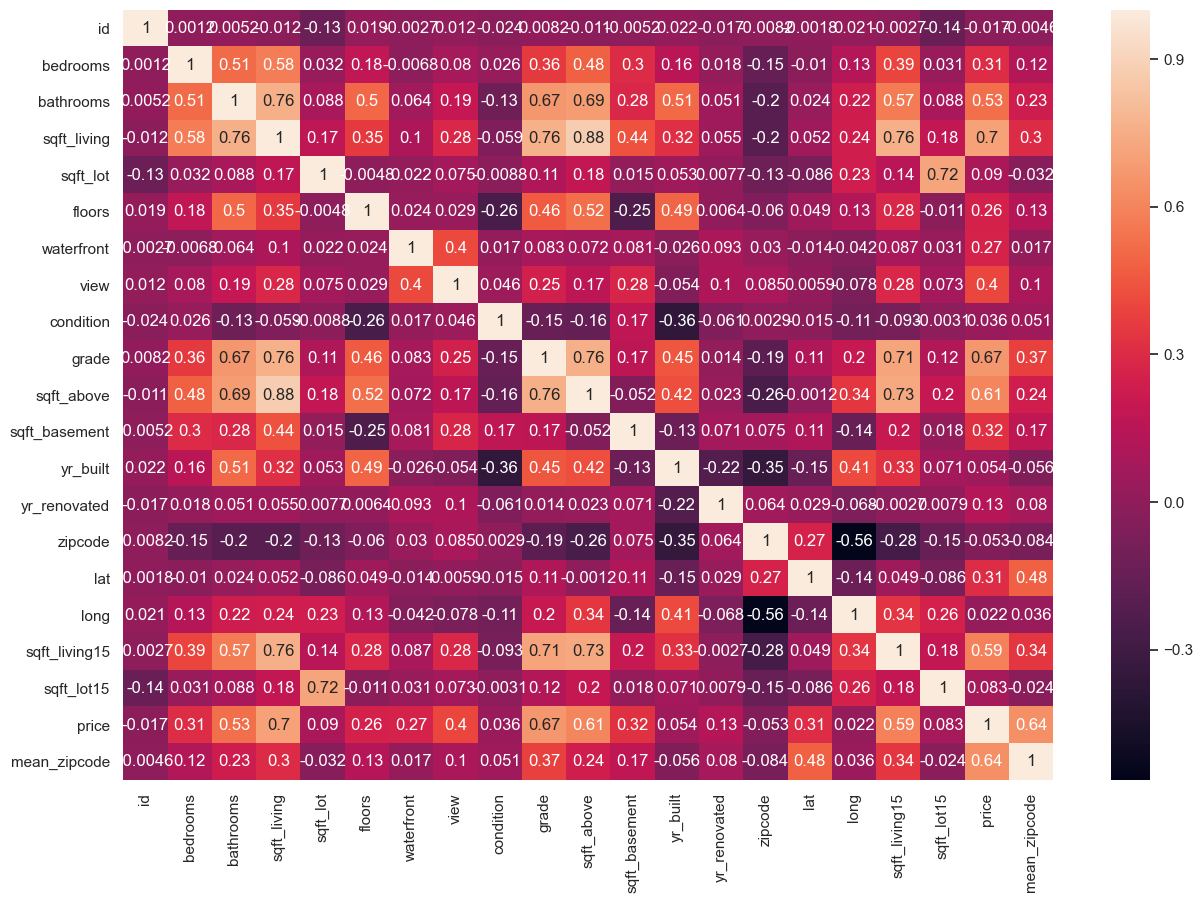

In [233]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)





<AxesSubplot: xlabel='zipcode', ylabel='price'>

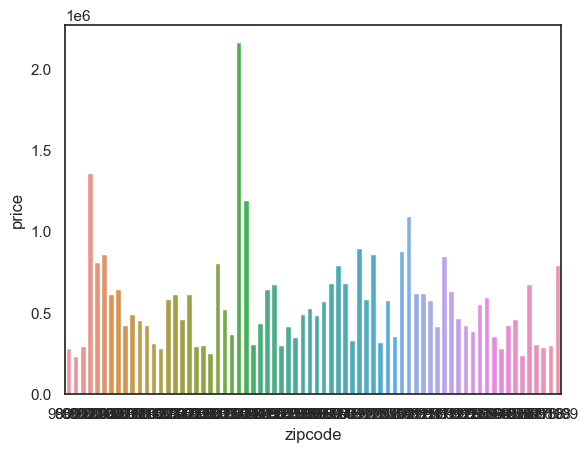

In [201]:
sns.barplot(df.groupby('zipcode').mean().index, 
            df.groupby('zipcode').mean().price)

In [124]:
#el mas caro es este
print(df.groupby('zipcode').mean().price.idxmax())


98039


In [202]:
X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,price,mean_zipcode
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,1340,5650,221900,310612.755725
1,6414100192,12/09/2014,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,1690,7639,538000,469928.767726
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,2720,8062,180000,462488.869258
3,2487200875,12/09/2014,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,1360,5000,604000,551768.520913
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,1800,7503,510000,685675.843537


In [217]:
X = X[['mean_zipcode', 'sqft_living', 'grade', 'floors', 'bedrooms',"bathrooms","sqft_lot15"]]

X.head()

,mean_zipcode,sqft_living,grade,floors,bedrooms,bathrooms,sqft_lot15
0,310612.755725,1180,7,1.0,3,1.00,5650
1,469928.767726,2570,7,2.0,3,2.25,7639
2,462488.869258,770,6,1.0,2,1.00,8062
3,551768.520913,1960,7,1.0,4,3.00,5000
4,685675.843537,1680,8,1.0,3,2.00,7503


In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=22)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17277, 7), (4320, 7), (17277,), (4320,))

le pasamos un 80 % de los datos

In [214]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler().fit(X_train)
mm = MinMaxScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_mm = mm.transform(X_train)
X_test_mm = mm.transform(X_test)

X_train_sc.shape, X_train_mm.shape



((17277, 7), (17277, 7))

In [178]:
X_train_sc.shape

(20517, 7)

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

def get_best_model_and_accuracy(x_train, x_test, y_train, y_test):
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('LASSO', Lasso()))
    models.append(('EN', ElasticNet()))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor()))
    models.append(('SVR', SVR()))
    models.append(('AB', AdaBoostRegressor()))
    models.append(('GB', GradientBoostingRegressor()))
    models.append(('RF', RandomForestRegressor()))
    models.append(('ET', ExtraTreesRegressor()))
    models.append(('BR', BayesianRidge()))
    models.append(('ARD', ARDRegression()))
    models.append(('PAR', PassiveAggressiveRegressor()))
    models.append(('TSR', TheilSenRegressor()))
    models.append(('RANSAC', RANSACRegressor()))
    models.append(('HR', HuberRegressor()))
    # evaluar cada modelo
    results = []
    names = []
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results.append(r2_score(y_test, y_pred))
        names.append(name)
        msg = "%s: %f" % (name, r2_score(y_test, y_pred))
        print(msg)
    return names[results.index(max(results))]
print(get_best_model_and_accuracy(X_train, X_test, y_train, y_test))

In [272]:
#regresion lineal
ln = LinearRegression()
ln_sc = LinearRegression()
ln_mm = LinearRegression()

from sklearn.linear_model import Lasso
ln_lasso = Lasso()
ln_lasso_sc = Lasso()
ln_lasso_mm = Lasso()



Entrenamos el modelo

In [273]:
ln.fit(X_train, y_train)
ln_sc.fit(X_train_sc,y_train)
ln_mm.fit(X_train_mm,y_train)


LinearRegression()

In [274]:
preds =ln.predict(X_test)
preds_sc =ln_sc.predict(X_test_sc)
preds_mm = ln_mm.predict(X_test_mm)

In [275]:
print(preds_mm[:10])
print(preds_sc[:10])
preds[:10]

[ 408388.04537163  542489.83071411  366352.72196128  409233.04769296
  237125.85909857  221344.51774026  637100.87003372 1633618.65811641
  658494.22714942  160275.59045204]
[ 408388.04537163  542489.83071411  366352.72196127  409233.04769296
  237125.85909857  221344.51774026  637100.87003372 1633618.65811641
  658494.22714942  160275.59045204]


array([ 408388.04537161,  542489.8307141 ,  366352.72196126,
        409233.04769296,  237125.85909857,  221344.51774026,
        637100.87003373, 1633618.65811634,  658494.22714945,
        160275.59045205])

In [276]:
ln.score(X_train, y_train), ln_sc.score(X_train_sc, y_train), ln_mm.score(X_train_mm, y_train)

(0.7125653130876393, 0.7125653130876393, 0.7125653130876393)

Aqui vemos la precision que tiene nuestro modelo

In [277]:
ln.score(X_test, y_test), ln.score(X_test_sc, y_test), ln.score(X_test_mm, y_test)

(0.713303684288546, -7.59282482048558, -7.405654832643686)

In [266]:
#buscar el modelo mas preciso

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge = Ridge()
lasso = Lasso()

params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_ridge = GridSearchCV(ridge, params, cv=5)
grid_lasso = GridSearchCV(lasso, params, cv=5)

grid_ridge.fit(X_train_sc, y_train)
grid_lasso.fit(X_train_sc, y_train)

grid_ridge.best_params_, grid_lasso.best_params_

grid_ridge.best_score_, grid_lasso.best_score_

grid_ridge.score(X_test_sc, y_test), grid_lasso.score(X_test_sc, y_test)


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print("Ridge")
print("MSE: ", mean_squared_error(y_test, grid_ridge.predict(X_test_sc)))
print("MAE: ", mean_absolute_error(y_test, grid_ridge.predict(X_test_sc)))
print("R2: ", r2_score(y_test, grid_ridge.predict(X_test_sc)))

print("Lasso")
print("MSE: ", mean_squared_error(y_test, grid_lasso.predict(X_test_sc)))
print("MAE: ", mean_absolute_error(y_test, grid_lasso.predict(X_test_sc)))
print("R2: ", r2_score(y_test, grid_lasso.predict(X_test_sc)))

#lineal
print("Lineal")
print("MSE: ", mean_squared_error(y_test, ln_lasso.predict(X_test)))
print("MAE: ", mean_absolute_error(y_test, ln_lasso.predict(X_test)))
print("R2: ", r2_score(y_test, ln_lasso.predict(X_test)))














Ridge
MSE:  39101697897.473854
MAE:  118591.41272725885
R2:  0.7132002459201496
Lasso
MSE:  39089941538.171936
MAE:  118760.85885967608
R2:  0.7132864754482255
Lineal
MSE:  39087595453.607895
MAE:  118782.42054796158
R2:  0.7133036833065078


vemos que el modelo lasso es un poco mas preciso por lo que nos quedamos con el



In [234]:
sc = StandardScaler().fit(X_train)
mm = MinMaxScaler().fit(X_train)



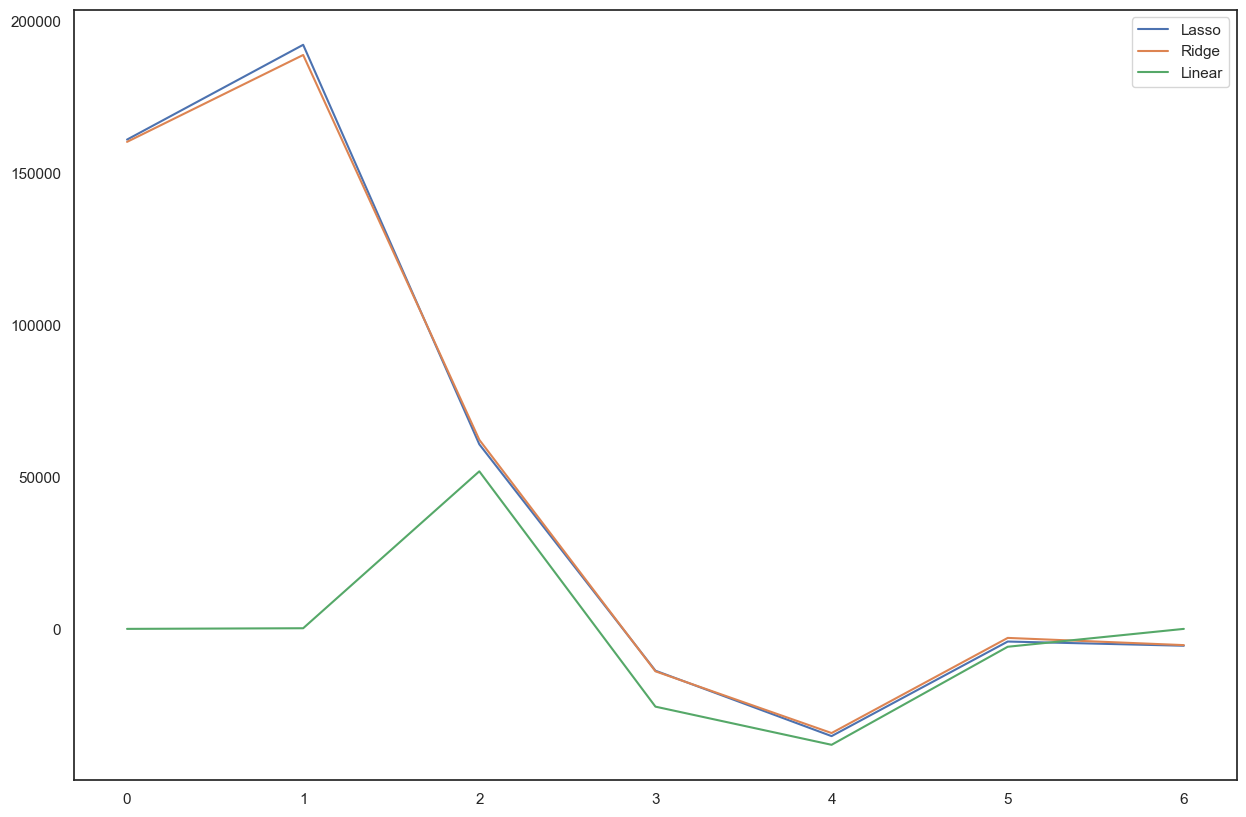

In [265]:


plt.figure(figsize=(15, 10))
plt.plot(grid_lasso.best_estimator_.coef_, label="Lasso")
plt.plot(grid_ridge.best_estimator_.coef_, label="Ridge")
plt.plot(ln.coef_, label="Linear")
plt.legend()
plt.show()







el verde muestra el lineal, el azul el lasso y el rojo el ridge que como vemos son muy parecidos, pero al ser mejor el ajuste lineal pues es el que nos quedamos y no cambiamos nada
